## Code For Analysing the Dataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

### Text Cleaning Functions

In [3]:
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Create set of stopwords for use in preprocessing
stopword_set = set(stopwords.words('english'))
# print(stopword_set)

def lemmatize_text(text):
    tokenised_text = nltk.word_tokenize(text)
    # Tag with Penn Treebank POS tags
    tagged_text = nltk.pos_tag(tokenised_text)

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word in tagged_text:
        pos_tag = get_wordnet_pos(word[1])
        if pos_tag == '':
            continue
        new_word = lemmatizer.lemmatize(word=word[0], pos=pos_tag)
        lemmatized_words.append(new_word)
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Convert into wordnet compatible POS tags (j, v, n , a)
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

# Fold to lower case
def to_lower_case(text):
    return text.lower()

def tokenise_text(text):
    tokens = nltk.word_tokenize(text)
    # print(tokens)
    return tokens

def remove_stopwords(text, stopword_set):
    # Split by whitespace
    split_text = text.split()
    new_tokens = []
    for token in split_text:
        if token in stopword_set:
            continue
        new_tokens.append(token)
    # Parse back into text
    return ' '.join(new_tokens)

# Remove all punctuations - Affects words such as U.S.A etc
# Removal of stop words has to be done prior to punctuation removal
def remove_punctuation(text):
    depunctuated_text = text.translate(str.maketrans('','', string.punctuation))
    return depunctuated_text

# Prevent concatenation of statistics and names
def replace_hyphens(text):
    return text.replace('-', ' ')

# Combine all processes into a single preprocess text function to call on df
# Default one used for training
def preprocess_text(text):
    dehyphenated_text = replace_hyphens(text)
    lowered_text = to_lower_case(dehyphenated_text)
    initial_stopword_pass = remove_stopwords(lowered_text, stopword_set)
    tokens = tokenise_text(initial_stopword_pass)
    tokenised_text = ' '.join(tokens)
    depunctuated_text = remove_punctuation(tokenised_text)
    second_stopword_pass = remove_stopwords(depunctuated_text, stopword_set)
    return second_stopword_pass

# Testing dataset 1
def preprocess_text_no_punctuation_keep_stowords(text):
    dehyphenated_text = replace_hyphens(text)
    lowered_text = to_lower_case(dehyphenated_text)
    depunctuated_text = remove_punctuation(lowered_text)
    return depunctuated_text

def remove_stopwords_two(text, stopword_set):
    # Split by whitespace
    split_text = text.split()
    new_tokens = []
    for token in split_text:
        temp_token = token.lower()
        if temp_token in stopword_set:
            continue
        new_tokens.append(token)
    # Parse back into text
    return ' '.join(new_tokens)

# Testing dataset 2
def preprocess_text_capitalised(text):
    dehyphenated_text = replace_hyphens(text)
    initial_stopword_pass = remove_stopwords_two(dehyphenated_text, stopword_set)
    tokens = tokenise_text(initial_stopword_pass)
    tokenised_text = ' '.join(tokens)
    depunctuated_text = remove_punctuation(tokenised_text)
    second_stopword_pass = remove_stopwords_two(depunctuated_text, stopword_set)
    return second_stopword_pass


In [4]:
# Pass in lists as x and y
def plot_bar_graph(x, y, title, xlabel, ylabel):
    fig = plt.figure(figsize = (8, 5))
    plt.rcParams['text.color'] = 'white'
    plt.bar(x, y, color ='#8D918D', width = 0.4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Count number of unique words
def unique_word_counter(texts):
    count = Counter() # Dictionary type
    # Access an entire string
    for text in texts:
        # Split each string into individual words separated by whitespace
        for word in text.split():
            count[word] += 1
    return count

In [5]:
# Read in RAW dataset files
train_path = './raw_data/fulltrain.csv'
test_path = './raw_data/balancedtest.csv'
df = pd.read_csv(train_path, header=None)
test_df = pd.read_csv(test_path, header=None)

classes = ['Satire', 'Hoax', 'Propaganda', 'Reliable News']
label_numbers = [1,2,3,4]

train_labels = []
test_labels = []

for label in label_numbers:
    print(classes[label-1] + ': ' + str((df[0] == label).sum()))
    train_labels.append((df[0] == label).sum())
print('==============')
for label in label_numbers:
    test_labels.append((test_df[0] == label).sum())
    print(classes[label-1] + ': ' + str((test_df[0] == label).sum()))

Satire: 14047
Hoax: 6942
Propaganda: 17870
Reliable News: 9995
Satire: 750
Hoax: 750
Propaganda: 750
Reliable News: 750


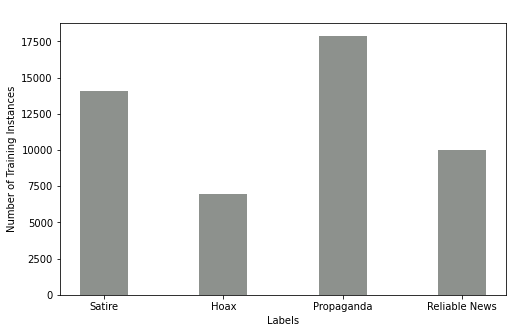

In [6]:
plot_bar_graph(classes, train_labels, 'Label Distribution', 'Labels', 'Number of Training Instances')

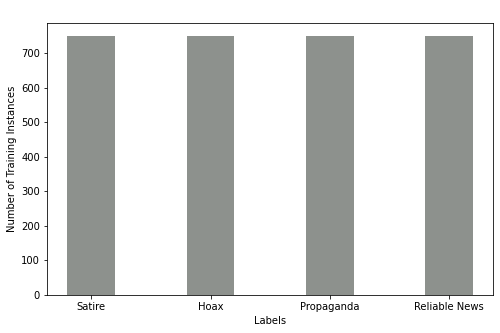

In [7]:
plot_bar_graph(classes, test_labels, 'Label Distribution', 'Labels', 'Number of Training Instances')

In [8]:
# Create test set to find unique words
unique_words_df = df

print('Cleaning training text...')
unique_words_df[1] = unique_words_df[1].map(preprocess_text_capitalised)
print('Preprocessing done!')

Cleaning training text...
Preprocessing done!


In [9]:
classes = ['Satire', 'Hoax', 'Propaganda', 'Reliable News']
label_numbers = [1,2,3,4]

satire_texts = unique_words_df.loc[df[0] == 1]
hoax_texts = unique_words_df.loc[df[0] == 2]
propaganda_texts = unique_words_df.loc[df[0] == 3]
reliable_texts = unique_words_df.loc[df[0] == 4]
print(satire_texts.shape)
print(hoax_texts.shape)
print(propaganda_texts.shape)
print(reliable_texts.shape)

satire_counts = unique_word_counter(satire_texts[1])
hoax_counts = unique_word_counter(hoax_texts[1])
propaganda_counts = unique_word_counter(propaganda_texts[1])
reliable_counts = unique_word_counter(reliable_texts[1])

(14047, 2)
(6942, 2)
(17870, 2)
(9995, 2)


In [10]:
print('SATIRE')
print('Number of unique words: ' + str(len(satire_counts)))
print('Most Common Words:')
satire_counts.most_common(15)

SATIRE
Number of unique words: 104057
Most Common Words:


[('said', 34714),
 ('time', 10819),
 ('one', 10608),
 ('would', 9672),
 ('like', 9000),
 ('year', 6962),
 ('could', 6145),
 ('get', 6077),
 ('even', 5863),
 ('new', 5690),
 ('added', 5435),
 ('people', 5299),
 ('amp', 5240),
 ('Monday', 5078),
 ('old', 4970)]

In [11]:
print('Hoax')
print('Number of unique words: ' + str(len(hoax_counts)))
print('Most Common Words:')
hoax_counts.most_common(15)

Hoax
Number of unique words: 41503
Most Common Words:


[('Obama', 7057),
 ('think', 6147),
 ('Trump', 4884),
 ('one', 3000),
 ('According', 2994),
 ('people', 2678),
 ('reports', 2598),
 ('would', 2587),
 ('time', 2423),
 ('told', 2250),
 ('President', 2249),
 ('Clinton', 2174),
 ('American', 2143),
 ('also', 2142),
 ('recent', 2096)]

In [12]:
print('Propaganda')
print('Number of unique words: ' + str(len(propaganda_counts)))
print('Most Common Words:')
propaganda_counts.most_common(15)

Propaganda
Number of unique words: 216915
Most Common Words:


[('US', 41794),
 ('people', 39055),
 ('would', 38141),
 ('one', 33755),
 ('government', 33160),
 ('like', 26437),
 ('also', 23117),
 ('time', 22561),
 ('even', 21127),
 ('said', 19366),
 ('many', 19143),
 ('world', 19078),
 ('could', 18424),
 ('years', 17631),
 ('us', 17274)]

In [13]:
print('Reliable')
print('Number of unique words: ' + str(len(reliable_counts)))
print('Most Common Words:')
reliable_counts.most_common(15)

Reliable
Number of unique words: 103140
Most Common Words:


[('said', 38571),
 ('would', 10208),
 ('year', 10179),
 ('percent', 9353),
 ('one', 8699),
 ('also', 7952),
 ('US', 7747),
 ('two', 7645),
 ('Taiwan', 7314),
 ('people', 7291),
 ('government', 6799),
 ('first', 6231),
 ('new', 5876),
 ('time', 5796),
 ('years', 5771)]

In [20]:
# Read in RAW dataset files
train_path = './raw_data/fulltrain.csv'
df = pd.read_csv(train_path, header=None)

classes = ['Satire', 'Hoax', 'Propaganda', 'Reliable News']
label_numbers = [1,2,3,4]

print('Cleaning training text...')
df[1] = df[1].map(preprocess_text_no_punctuation_keep_stowords)
print('Preprocessing done!')

satire_texts = df.loc[df[0] == 1]
hoax_texts = df.loc[df[0] == 2]
propaganda_texts = df.loc[df[0] == 3]
reliable_texts = df.loc[df[0] == 4]
print(satire_texts.shape)
print(hoax_texts.shape)
print(propaganda_texts.shape)
print(reliable_texts.shape)

Cleaning training text...
Preprocessing done!
(14047, 2)
(6942, 2)
(17870, 2)
(9995, 2)


In [21]:
# Return average number of words in a class
def count_words(texts, number_of_instances):
    word_count = 0
    for text in texts:
        x = text.split()
        word_count += len(x)
    return (word_count/number_of_instances)

In [22]:
satire_word_count = count_words(satire_texts[1], 14047)
hoax_word_count = count_words(hoax_texts[1], 6942)
propaganda_word_count = count_words(propaganda_texts[1], 17870)
reliable_word_count = count_words(reliable_texts[1], 9995)

print('AVERAGE WORD COUNTS')
print('Satire word count: ' + str(satire_word_count))
print('Hoax word count: ' + str(hoax_word_count))
print('Propaganda word count: ' + str(propaganda_word_count))
print('Reliable word count: ' + str(reliable_word_count))

AVERAGE WORD COUNTS
Satire word count: 298.8686552288745
Hoax word count: 195.56856813598387
Propaganda word count: 919.2317291550083
Reliable word count: 446.89474737368687


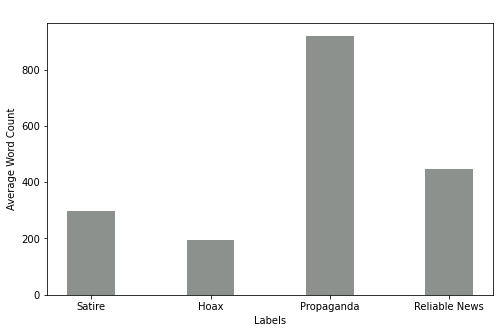

In [23]:
values = [satire_word_count, hoax_word_count, propaganda_word_count, reliable_word_count]

plot_bar_graph(classes, values, 'Average Word Counts', 'Labels', 'Average Word Count')

In [30]:
def identify_and_count_pov_words(texts, count):
    first_pov_words = ['i', 'me', 'my', 'mine', 'myself', 'ourself', 'ourselves']
    second_pov_words = ['you', 'yours', 'yourself', 'yourselves']
    third_pov_words = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves']
    pov_word_counts = { 1:0, 2:0, 3:0 }

    for text in texts:
        x = text.split()
        for token in x:
            if token in first_pov_words:
                pov_word_counts[1] += 1
            elif token in second_pov_words:
                pov_word_counts[2] += 1
            elif token in third_pov_words:
                pov_word_counts[3] += 1
    pov_word_counts[1] = round(pov_word_counts[1] / count, 2)
    pov_word_counts[2] = round(pov_word_counts[2] / count, 2)
    pov_word_counts[3] = round(pov_word_counts[3] / count, 2)
    return pov_word_counts

In [31]:
satire_pov_count = identify_and_count_pov_words(satire_texts[1], 14047)
hoax_pov_count = identify_and_count_pov_words(hoax_texts[1], 6942)
propaganda_pov_count = identify_and_count_pov_words(propaganda_texts[1], 17870)
reliable_pov_count = identify_and_count_pov_words(reliable_texts[1], 9995)

print('AVERAGE POV COUNTS')
print('Satire pov count: ' + str(satire_pov_count))
print('Hoax pov count: ' + str(hoax_pov_count))
print('Propaganda pov count: ' + str(propaganda_pov_count))
print('Reliable pov count: ' + str(reliable_pov_count))

AVERAGE POV COUNTS
Satire pov count: {1: 3.87, 2: 1.06, 3: 11.44}
Hoax pov count: {1: 1.31, 2: 1.77, 3: 8.59}
Propaganda pov count: {1: 5.55, 2: 5.37, 3: 25.56}
Reliable pov count: {1: 1.83, 2: 0.74, 3: 13.68}


In [44]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re
from collections import defaultdict

# Read in RAW dataset files
train_path = './raw_data/fulltrain.csv'
df = pd.read_csv(train_path, header=None)

satire_texts = df.loc[df[0] == 1]
hoax_texts = df.loc[df[0] == 2]
propaganda_texts = df.loc[df[0] == 3]
reliable_texts = df.loc[df[0] == 4]

hoax_texts.sample(15)

In [45]:
contractions = ["n't","'s","'ve","'d","'ll", "'m", "'re"]

def count_contractions(texts):
    contractions_dict = defaultdict(lambda: 0)
    for text in texts:
        tokenised_text = nltk.word_tokenize(text)
        for token in tokenised_text:
            new_token = token.lower()
            if new_token in contractions:
                contractions_dict['Total'] += 1
                contractions_dict[new_token] += 1
    return contractions_dict

In [46]:
satire_c_count = count_contractions(satire_texts[1])
hoax_c_count = count_contractions(hoax_texts[1])
propaganda_c_count = count_contractions(propaganda_texts[1])
reliable_c_count = count_contractions(reliable_texts[1])

print('AVERAGE C COUNTS')
print('Satire c count: ' + str(satire_c_count))
print('Hoax c count: ' + str(hoax_c_count))
print('Propaganda c count: ' + str(propaganda_c_count))
print('Reliable c count: ' + str(reliable_c_count))

AVERAGE C COUNTS
Satire c count: defaultdict(<function count_contractions.<locals>.<lambda> at 0x0000011D80E4ED30>, {'Total': 59588, "'s": 34890, "'ll": 2134, "n't": 11049, "'d": 2387, "'m": 3426, "'re": 3048, "'ve": 2654})
Hoax c count: defaultdict(<function count_contractions.<locals>.<lambda> at 0x0000011D80E50040>, {})
Propaganda c count: defaultdict(<function count_contractions.<locals>.<lambda> at 0x0000011D80D801F0>, {})
Reliable c count: defaultdict(<function count_contractions.<locals>.<lambda> at 0x0000011D88443C10>, {'Total': 63797, "'s": 48789, "n't": 8184, "'re": 2493, "'ve": 1436, "'m": 1326, "'ll": 879, "'d": 690})
